In [1]:
import os
os.chdir('E:\kdg\Data 3\data3\data_aux')

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import six
import sys
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import t
from scipy.stats import ttest_1samp
import statistics

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [5]:
missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing', 'missing', 'Unknown', 'unknown', 'UNKNOWN']

# 4. DISCRIMINANT ANALYSIS IN PYTHON

Load data:

In [6]:
biopsy = pd.read_csv('biopsy.csv',delimiter=';')
biopsy.info()
biopsy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      699 non-null    int64  
 1   V1      699 non-null    int64  
 2   V2      699 non-null    int64  
 3   V3      699 non-null    int64  
 4   V4      699 non-null    int64  
 5   V5      699 non-null    int64  
 6   V6      683 non-null    float64
 7   V7      699 non-null    int64  
 8   V8      699 non-null    int64  
 9   V9      699 non-null    int64  
 10  class   699 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB


ID          V1          V2          V3          V4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               V5          V6          V7          V8          V9  
count  699.000000  683.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413  
std      2.214300    3.643857    2.438364    3.053634    1.715078  
min      1.000000    1.000000    1.000000    1.000000    1.000000  
25%      2.000000    1.000000    2.000000    1.000000    1.000000  
50%      2.000000    1.000000    3.000000    1.000000    1.000000  
75%      4.000000    6.000000    5.000000    4.000000    1.000000  
max     10.000000   10.000000   10.000000   10.000000   10.000000

### Exploration

Look at spread per variable:

<Figure size 640x480 with 0 Axes>

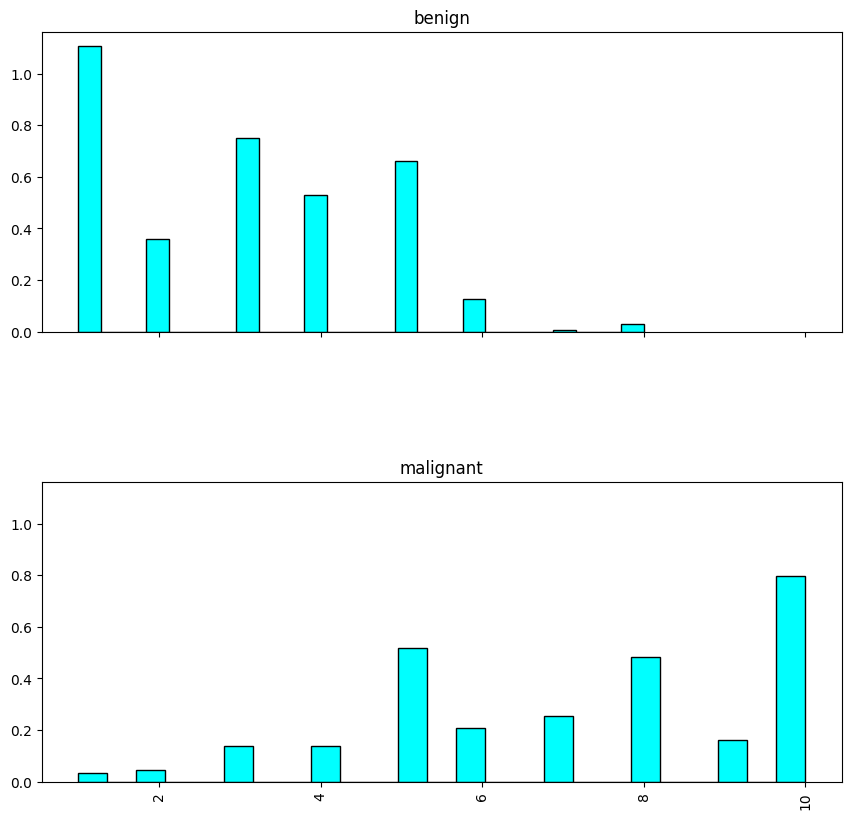

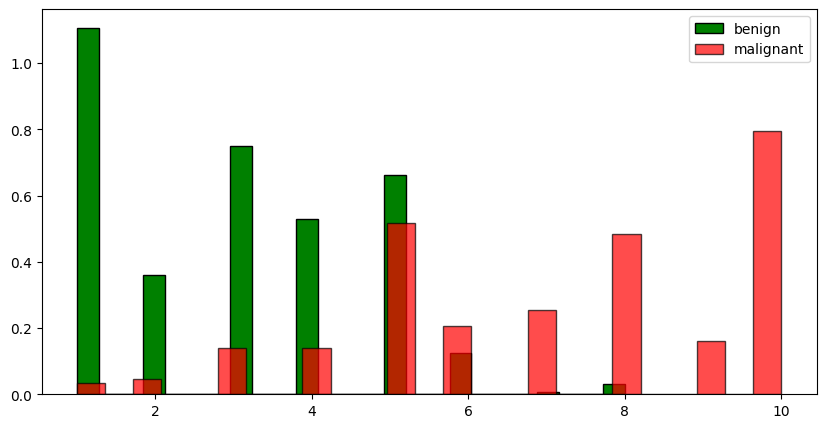

In [7]:
v = 'V1'
df = pd.DataFrame(zip(biopsy[v], biopsy['class']), columns=['V','Target'])
plt.figure()
df.hist(column=['V'], by='Target',
           bins=25, density=True,
           edgecolor='black', color='cyan',
           sharex=True, sharey=True,
           figsize=(10,10), layout=(2,1))
fig, ax = plt.subplots(figsize=(10,5))
df['V'][df['Target'] == 'benign'].hist(ax=ax, bins=25, density = True,
                                               edgecolor='black', color='green', label='benign')
df['V'][df['Target'] == 'malignant'].hist(ax=ax, bins=25, density = True,
                                                  edgecolor='black', color='red', alpha=0.7, label='malignant')
ax.legend()
ax.grid(False)
plt.show()

### Discriminant analysis

Fit model:

In [8]:
### Descriptive discriminant analysis ###
X = biopsy[['V1','V2', 'V3']]
y = biopsy['class']
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [9]:
print('Classes : ')
print()
print(lda.classes_) # classes: values of the dependent variable
print()

print('Prior probabilities : ')
print()
print(lda.priors_ ) #The prior probability is the probability of an observation coming from a particular group in a simple random sample with replacement.
print()
print(biopsy['class'].value_counts())
print()

print('Coef : ')
print()
print(lda.coef_) # NOT coefficients of the discriminant function(s) but weight for the conditional probabilities!!!
print()

print('Explained variance : ')
print()
print(lda.explained_variance_ratio_) #how much of the variance is explained by each of the discriminant functions (only useful when there are several discriminant functions

Classes : 

['benign' 'malignant']

Prior probabilities : 

[0.65522175 0.34477825]

benign       458
malignant    241
Name: class, dtype: int64

Coef : 

[[0.83914863 0.93071616 0.90395284]]

Explained variance : 

[1.]


Predictions based on model:

In [10]:
print(lda.predict_proba(X))

[[9.97899809e-01 2.10019056e-03]
 [6.59174524e-01 3.40825476e-01]
 [9.99607241e-01 3.92758792e-04]
 ...
 [3.20431130e-05 9.99967957e-01]
 [1.74295687e-02 9.82570431e-01]
 [2.90066726e-03 9.97099333e-01]]


In [11]:
biopsy['pred'] = lda.predict(X)
biopsy['error'] = 0
biopsy.loc[biopsy['pred']!=biopsy['class'], 'error'] = 1
biopsy[['class','pred', 'error']]

class       pred  error
0       benign     benign      0
1       benign     benign      0
2       benign     benign      0
3       benign  malignant      1
4       benign     benign      0
5    malignant  malignant      0
6       benign     benign      0
7       benign     benign      0
8       benign     benign      0
9       benign     benign      0
10      benign     benign      0
11      benign     benign      0
12   malignant     benign      1
13      benign     benign      0
14   malignant  malignant      0
15   malignant  malignant      0
16      benign     benign      0
17      benign     benign      0
18   malignant  malignant      0
19      benign     benign      0
20   malignant     benign      1
21   malignant  malignant      0
22      benign     benign      0
23   malignant  malignant      0
24      benign     benign      0
25   malignant     benign      1
26      benign     benign      0
27      benign     benign      0
28      benign     benign      0
29      benign     benign      0
30      benign     benign      0
31      benign     benign      0
32   malignant  malignant      0
33      benign     benign      0
34      benign     benign      0
35      benign     benign      0
36   malignant  malignant      0
37      benign     benign      0
38   malignant     benign      1
39   malignant     benign      1
40      benign  malignant      1
41   malignant  malignant      0
42   malignant  malignant      0
43   malignant  malignant      0
44   malignant  malignant      0
45      benign     benign      0
46   malignant  malignant      0
47      benign     benign      0
48      benign     benign      0
49   malignant  malignant      0
50   malignant  malignant      0
51   malignant     benign      1
52   malignant  malignant      0
53   malignant  malignant      0
54   malignant  malignant      0
55   malignant  malignant      0
56   malignant  malignant      0
57   malignant     benign      1
58   malignant     benign      1
59   malignant  malignant      0
60   malignant     benign      1
61      benign     benign      0
62   malignant  malignant      0
63   malignant     benign      1
64      benign     benign      0
65   malignant  malignant      0
66      benign     benign      0
67   malignant     benign      1
68   malignant  malignant      0
69      benign     benign      0
70      benign     benign      0
71   malignant  malignant      0
72      benign     benign      0
73   malignant  malignant      0
74   malignant  malignant      0
75      benign     benign      0
76      benign     benign      0
77      benign     benign      0
78      benign     benign      0
79      benign     benign      0
80      benign     benign      0
81      benign     benign      0
82      benign     benign      0
83      benign     benign      0
84   malignant  malignant      0
85   malignant  malignant      0
86   malignant     benign      1
87   malignant  malignant      0
88      benign     benign      0
89      benign     benign      0
90      benign     benign      0
91      benign     benign      0
92      benign     benign      0
93      benign     benign      0
94      benign     benign      0
95      benign     benign      0
96      benign     benign      0
97      benign     benign      0
98   malignant  malignant      0
99   malignant  malignant      0
100  malignant  malignant      0
101  malignant     benign      1
102     benign     benign      0
103  malignant     benign      1
104  malignant  malignant      0
105  malignant  malignant      0
106  malignant  malignant      0
107  malignant  malignant      0
108     benign     benign      0
109  malignant  malignant      0
110     benign     benign      0
111  malignant  malignant      0
112  malignant  malignant      0
113  malignant  malignant      0
114     benign     benign      0
115     benign     benign      0
116     benign  malignant      1
117  malignant  malignant      0
118     benign     benign      0
119     benign     benign      0
120     benign  

In [12]:
print('Accuracy : ' + str(1-(biopsy['error'].sum()/len(biopsy))))

Accuracy : 0.938483547925608


Confusion matrix:

In [13]:
predicted = pd.Series(lda.predict(X), name='predicted')
actual = biopsy['class'].rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')

predicted  benign  malignant  total
actual                             
benign        448         10    458
malignant      33        208    241
total         481        218    699

### How are decisions made (how are objects classified)?

Transform original variables into new coordinate, and use that new coordinate value to classify:

In [14]:
# map the independent variables based on the discriminant functions of the model to their N discriminant values
LD = lda.transform(X)
# combine with the original dependent variable
LD_df = pd.DataFrame(zip(biopsy['V1'], biopsy['V2'], biopsy['V3'], biopsy['class'], LD[:,0], biopsy['pred']), columns=['V1','V2','V3','target', 'LD1','pred'])
LD_df

V1  V2  V3     target       LD1       pred
0     5   1   1     benign -0.966444     benign
1     5   4   4     benign  0.556227     benign
2     3   1   1     benign -1.430741     benign
3     6   8   8     benign  2.818604  malignant
4     4   1   1     benign -1.198593     benign
5     8  10  10  malignant  4.298015  malignant
6     1   1   1     benign -1.895039     benign
7     2   1   2     benign -1.412814     benign
8     2   1   1     benign -1.662890     benign
9     4   2   1     benign -0.941112     benign
10    1   1   1     benign -1.895039     benign
11    2   1   1     benign -1.662890     benign
12    5   3   3  malignant  0.048670     benign
13    1   1   1     benign -1.895039     benign
14    8   7   5  malignant  2.275191  malignant
15    7   4   6  malignant  1.520677  malignant
16    4   1   1     benign -1.198593     benign
17    4   1   1     benign -1.198593     benign
18   10   7   7  malignant  3.239641  malignant
19    6   1   1     benign -0.734296     benign
20    7   3   2  malignant  0.262890     benign
21   10   5   5  malignant  2.224527  malignant
22    3   1   1     benign -1.430741     benign
23    8   4   5  malignant  1.502749  malignant
24    1   1   1     benign -1.895039     benign
25    5   2   3  malignant -0.208811     benign
26    3   2   1     benign -1.173261     benign
27    5   1   1     benign -0.966444     benign
28    2   1   1     benign -1.662890     benign
29    1   1   3     benign -1.394886     benign
30    3   1   1     benign -1.430741     benign
31    2   1   1     benign -1.662890     benign
32   10   7   7  malignant  3.239641  malignant
33    2   1   1     benign -1.662890     benign
34    3   1   2     benign -1.180665     benign
35    2   1   1     benign -1.662890     benign
36   10  10  10  malignant  4.762312  malignant
37    6   2   1     benign -0.476815     benign
38    5   4   4  malignant  0.556227     benign
39    2   5   3  malignant -0.132815     benign
40    6   6   6     benign  1.803490  malignant
41   10   4   3  malignant  1.466893  malignant
42    6  10  10  malignant  3.833718  malignant
43    5   6   5  malignant  1.321264  malignant
44   10  10  10  malignant  4.762312  malignant
45    1   1   1     benign -1.895039     benign
46    3   7   7  malignant  1.614601  malignant
47    1   1   1     benign -1.895039     benign
48    4   1   1     benign -1.198593     benign
49    7   8   7  malignant  2.800676  malignant
50    9   5   8  malignant  2.742608  malignant
51    5   3   3  malignant  0.048670     benign
52   10   3   6  malignant  1.959642  malignant
53    5   5   5  malignant  1.063784  malignant
54   10   5   5  malignant  2.224527  malignant
55   10   6   6  malignant  2.732084  malignant
56    8  10  10  malignant  4.298015  malignant
57    8   2   4  malignant  0.737712     benign
58    5   2   3  malignant -0.208811     benign
59    9   5   5  malignant  1.992378  malignant
60    5   3   5  malignant  0.548823     benign
61    1   1   1     benign -1.895039     benign
62    9  10  10  malignant  4.530164  malignant
63    6   3   4  malignant  0.530895     benign
64    1   1   1     benign -1.895039     benign
65   10   4   2  malignant  1.216817  malignant
66    4   1   1     benign -1.198593     benign
67    5   3   4  malignant  0.298746     benign
68    8   3   8  malignant  1.995498  malignant
69    1   1   1     benign -1.895039     benign
70    5   1   3     benign -0.466291     benign
71    6  10   2  malignant  1.833106  malignant
72    1   3   3     benign -0.879925     benign
73    9   4   5  malignant  1.734898  malignant
74   10   6   4  malignant  2.231931  malignant
75    1   1   2     benign -1.644962     benign
76    1   1   4     benign -1.144809     benign
77    5   3   1     benign -0.451483     benign
78    3   1   1     benign -1.430741     benign
79    2   1   1     benign -1.662890     benign
80    2   2   2     benign -1.155333     benign
81    4   1   1     benign -1.198593     benign
82    5   2   1     b

<Figure size 640x480 with 0 Axes>

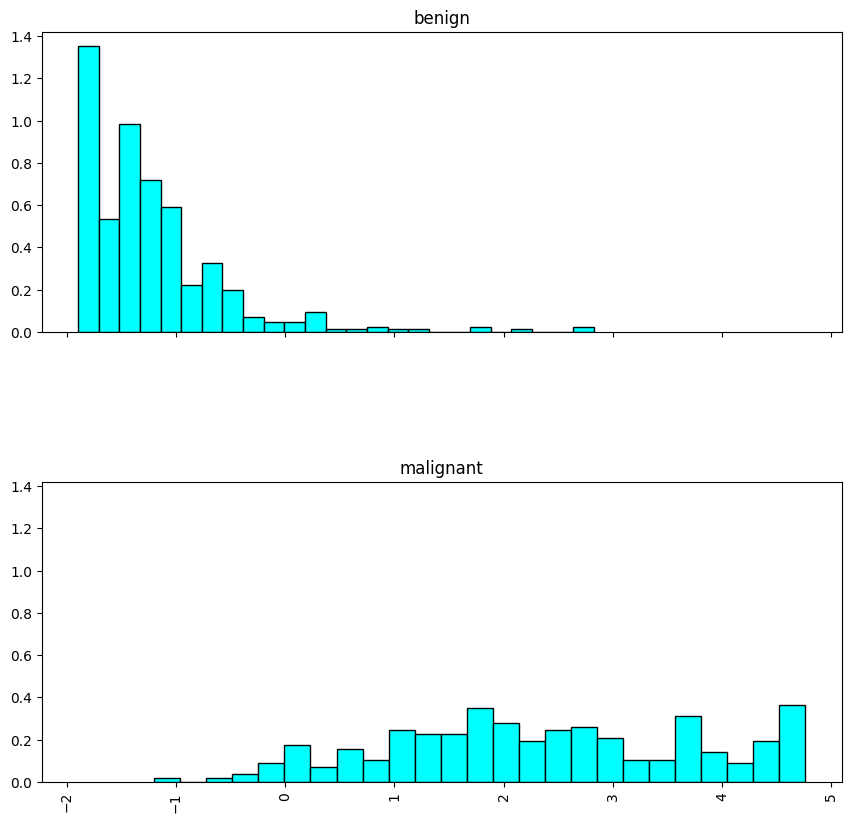

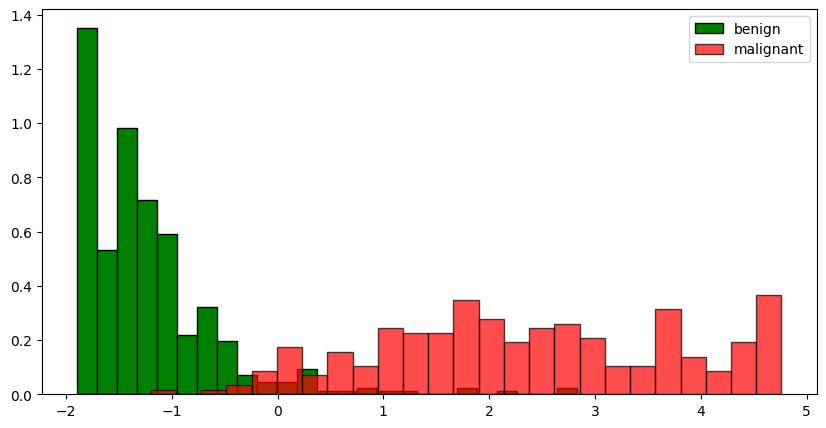

In [15]:
plt.figure()
LD_df.hist(column=['LD1'], by='target',
            bins=25, density=True,
            edgecolor='black', color='cyan',
            sharex=True, sharey=True,
            figsize=(10,10), layout=(2,1))
fig, ax = plt.subplots(figsize=(10,5))
LD_df['LD1'][LD_df['target'] == 'benign'].hist(ax=ax, bins=25, density = True,
                                             edgecolor='black', color='green', label='benign')
LD_df['LD1'][LD_df['target'] == 'malignant'].hist(ax=ax, bins=25, density = True,
                                         edgecolor='black', color='red', alpha=0.7, label='malignant')
ax.legend()
ax.grid(False)
plt.show()


How to find coefficients of discriminant function?

In [18]:
def LDA_coefficients(X,lda):
    nb_col = X.shape[1] # number of variables in dataset
    matrix= np.zeros((nb_col+1,nb_col), dtype=int) # Matrix with n columns and n+1 rows
    Z=pd.DataFrame(data=matrix,columns=X.columns)         # Dataframe with variable names
    for j in range(0,nb_col):                             # Fill diagonals with 1
        Z.iloc[j,j] = 1
    LD = lda.transform(Z)                                 # Transform values
    nb_funct= LD.shape[1]                                 # Number of columns in transforma matrix
                                                          # = Number of discriminant functions
    result = pd.DataFrame();                              # empty dataframe
    index = ['const']
    for j in range(0,LD.shape[0]-1):                       # Find number of variables and name them as Cx
        index = np.append(index,'C'+str(j+1))
    for i in range(0,LD.shape[1]):                         # For every discriminant function
        coef = [LD[-1][i]]                                 # Get last value (intercept
        for j in range(0,LD.shape[0]-1):                   # Coefficient = tranformed value minus intercept
            coef = np.append(coef,LD[j][i]-LD[-1][i])
        coef_column = pd.Series(coef)
        coef_column.index = index
        column_name = 'LD' + str(i+1)
        result[column_name] = coef_column
    return result

In [19]:
print(LDA_coefficients(X,lda)) # coefficients of the discriminant function

            LD1
const -2.634744
C1     0.232149
C2     0.257481
C3     0.250077


Example (first object):
V1 = 5 
V2 = 1 
V3 = 1
LD1 = const + C1xV1 + C2xV2 + C3xV3

In [20]:
V1=5; V2=1; V3=1
const=LDA_coefficients(X,lda)['LD1'][0]
C1=LDA_coefficients(X,lda)['LD1'][1]
C2=LDA_coefficients(X,lda)['LD1'][2]
C3=LDA_coefficients(X,lda)['LD1'][3]
LD1 = const + (C1 * V1) + (C2 *V2) + (C3 * V3)
print('LD1 : ' + str(LD1))

LD1 : -0.9664442860045073


### Predict new case

In [21]:
### Predictive discriminant analysis ###
print(lda.predict([[5,6,8]]))
print(lda.predict_proba([[5,6,8]]))

['malignant']
[[0.0080211 0.9919789]]


C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


# 6. QUESTIONNAIRE

Load data:

In [22]:
studenq = pd.read_csv('Questionnaire 21-22.csv', delimiter=';', decimal='.')
studenq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Letter         39 non-null     object 
 1   Number Languages     39 non-null     float64
 2   Writing Hand         39 non-null     object 
 3   Shoe Size            39 non-null     float64
 4   Length               39 non-null     int64  
 5   Blood Type           39 non-null     object 
 6   Resus Factor         39 non-null     object 
 7   Siblings             39 non-null     int64  
 8   Internet Purchase    39 non-null     object 
 9   Mobile Devices       39 non-null     int64  
 10  Leisure              39 non-null     object 
 11  Hours Math           39 non-null     object 
 12  Importance AI Study  39 non-null     object 
 13  Antwerp Address      39 non-null     object 
 14  Travel Distance      39 non-null     float64
 15  Travel Time          39 non-null     int64

## Question 1

1.a. Can you predict if a new student is a smoker based on the indicated length (173), shoe size (40), travel distance (5) and travel time (10) of this student?

In [23]:
subset = studenq[['Length','Shoe Size', 'Travel Distance', 'Travel Time','Smoker']].copy()
subset.dropna(inplace=True)
subset = subset.reset_index() # if not impact on evaluation metrics
X = subset[['Length','Shoe Size','Travel Distance', 'Travel Time']]
y = subset['Smoker']
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
lda.predict([[173,40,5,10]])

C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

1.b. Make a confusion matrix based on the predictions and the actual values for the data you used to build the discriminant analysis model

In [24]:
predicted = pd.Series(lda.predict(X), name='predicted')
actual = subset['Smoker'].rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')

predicted  No  Yes  total
actual                   
No         24    1     25
Yes        12    2     14
total      36    3     39

1.c. Calculate the usual evaluation metrics for a binary classification

In [25]:
def accuracy(confusion_matrix):
    return np.diag(confusion_matrix).sum()/confusion_matrix.sum().sum()

def precision(confusion_matrix):
    precision = []
    n = confusion_matrix.shape[1]
    for i in range(0,n):
        TP = confusion_matrix.loc[confusion_matrix.index[i]][confusion_matrix.index[i]]
        precision = precision + [TP/confusion_matrix.loc[:, confusion_matrix.index[i]].sum()]
    return precision

def recall(confusion_matrix):
    recall = []
    n = confusion_matrix.shape[0]
    for i in range(0,n):
        TP = confusion_matrix.loc[confusion_matrix.index[i]][confusion_matrix.index[i]]
        recall = recall + [TP/confusion_matrix.loc[confusion_matrix.index[i], :].sum()]
    return recall

def f_measure(confusion_matrix, beta):
    precisionarray = precision(confusion_matrix)
    recallarray = recall(confusion_matrix)
    fmeasure=[]
    n = len(precisionarray)
    for i in range(0,n):
        p = precisionarray[i]
        r = recallarray [i]
        fmeasure = fmeasure + [((beta*beta+1)*p*r)/(beta*beta*p+r)]
    return fmeasure

def overviewmetrics(confusion_matrix, beta):
    overview_1 = np.transpose(precision (confusion_matrix))
    overview_2 = np.transpose(recall(confusion_matrix))
    overview_3 = np.transpose(f_measure(confusion_matrix,beta))
    overview_table=pd.DataFrame (data=np.array([overview_1, overview_2, overview_3]), columns=confusion_matrix.index)
    overview_table.index = ['precision', 'recall', 'fx']
    return[overview_table]

def positiverates(confusion_matrix):
    if (confusion_matrix.shape[0] == 2) & (confusion_matrix.shape[1] == 2):
        TPR = confusion_matrix.iloc[0][0]/confusion_matrix.iloc[0, :].sum()
        print('TPR', TPR)
        FPR = confusion_matrix.iloc[1][0]/confusion_matrix.iloc[1, :].sum()
        print('FPR', FPR)
    return


In [26]:
confusion_matrix = pd.crosstab(index=actual, columns=predicted)
# if (np.array_equal (actual.unique(), predicted.unique())):
#     print ('True')
print('Accuracy : ' + str(accuracy(confusion_matrix)))
print(overviewmetrics(confusion_matrix,1))
positiverates(confusion_matrix)

Accuracy : 0.6666666666666666
[actual           No       Yes
precision  0.666667  0.666667
recall     0.960000  0.142857
fx         0.786885  0.235294]
TPR 0.96
FPR 0.8571428571428571


1.d. Draw the ROC curve

In [27]:
#Plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc(y_true, y_score, title='ROC Curve', **kwargs):
    title='ROC Curve'
    if 'pos_label' in kwargs:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc = roc_auc_score(y_true, y_score)
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
        auc = roc_auc_score(y_true, y_score)

    # calculate optimal cut-off with Youden index method
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    figsize = kwargs.get('figsize', (7, 7))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')

    # plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')

    # plot classifier
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # plot optimal cut-off
    ax.scatter(fpr[optimal_idx], tpr[optimal_idx], label='optimal cutoff {:.2f} on ({:.2f},{:.2f})'.format(optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')

    ax.legend(loc='lower right')
    plt.savefig("myROCcurve.png")
    plt.show()


In [28]:
y_score = lda.predict_proba(X)[:,0]
plot_roc(actual, y_score, pos_label='Yes') # home made function

## Question 2

2\. What is the accuracy of the discriminant analysis in which length and shoe size predict the writing hand?

In [29]:
###Question 2 ###
subset2 = studenq[['Length','Shoe Size', 'Writing Hand']].copy()
subset2.dropna(inplace=True)
subset2 = subset2.reset_index() # if not impact on evaluation metrics
X2 = subset2[['Length','Shoe Size']]
y2 = subset2['Writing Hand']
lda = LinearDiscriminantAnalysis()
lda.fit(X2,y2)

LinearDiscriminantAnalysis()

In [30]:
predicted2 = pd.Series(lda.predict(X2), name='predicted')
actual = subset2['Writing Hand'].rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')
accuracy(pd.crosstab(index=actual, columns=predicted))  # home made function

0.10256410256410256